In [158]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

In [159]:
df = pd.read_parquet("../data/raw/input_dataset-2.parquet")

In [160]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.068018e+06,1.068018e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,1.637421e+03,1.679710e+03,1.784819e+02,1.657813e+02,1.462637e+02,2.257179e+02,2.986768e+02,1.618114e+02,1.454601e-01,4.567642e-01
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,2.007034e+00,4.540256e+00,2.019696e+00,4.113352e+00,2.145015e-01,2.001803e-01,7.708676e-01,3.447038e-01,2.508660e-02,2.421547e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,1.587784e+03,1.608899e+03,1.753436e+02,1.629430e+02,1.457152e+02,2.243099e+02,2.977115e+02,1.608971e+02,5.138796e-02,1.300494e-01
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.636916e+03,1.676754e+03,1.768119e+02,1.632180e+02,1.460956e+02,2.256090e+02,2.980816e+02,1.616467e+02,1.363742e-01,4.458940e-01
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.637458e+03,1.677958e+03,1.783134e+02,1.642139e+02,1.463355e+02,2.257666e+02,2.985405e+02,1.618121e+02,1.467246e-01,4.788169e-01
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.637769e+03,1.681526e+03,1.796520e+02,1.655471e+02,1.464563e+02,2.258674e+02,2.990896e+02,1.620740e+02,1.555545e-01,4.995086e-01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.642896e+03,1.694804e+03,1.834105e+02,1.788814e+02,1.471180e+02,2.260519e+02,3.012224e+02,1.629766e+02,1.355756e+00,5.316383e+01


# Mode to binary

In [161]:
df["is_starting"] = df["mode"].replace("operation", 0).replace("start", 1)

## Netto Power: Unit_4_Power - Unit_4_Reactive Power

In [162]:
df["Netto Power"] = df["Unit_4_Power"] - df["Unit_4_Reactive Power"]

# Unit_4_Power / Vane opening

In [163]:
df["Power / vane opening"] = df["Unit_4_Power"] / df["Turbine_Guide Vane Opening"]

# Active_turbine_cumsum (sec)

In [166]:
df["startnr"] = (df["is_starting"]==1).cumsum()
df["seconds_since_last_data"] = pd.Series(df.index, index=df.index).diff().dt.seconds
df["seconds_since_last_start"] = df.groupby("startnr")["seconds_since_last_data"].cumsum()
df.loc[df["is_starting"]==1, "seconds_since_last_start"] = 0

# Turbine Bearing Vibration / turbine speed

In [167]:
df["turbine_bearing_vib / speed"] = df["turbine_bearing_vib_vrt"] / df["Turbine_Rotational Speed"]

# Power / Drafttube Pressure

In [168]:
df["Power / Drafttube pressure"] = df["Unit_4_Power"] / df["Turbine_Pressure Drafttube"]

<AxesSubplot:xlabel='timepoints'>

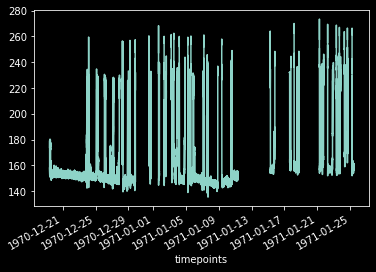

In [169]:
df["Turbine_Pressure Drafttube"].plot()

In [170]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,lower_bearing_vib_vrt,turbine_bearing_vib_vrt,is_starting,Netto Power,Power / vane opening,startnr,seconds_since_last_data,seconds_since_last_start,turbine_bearing_vib / speed,Power / Drafttube pressure
count,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,1.750000e+06,...,1.068018e+06,1.068018e+06,1.874087e+06,1.750000e+06,1.749962e+06,1.874087e+06,1.874086e+06,1.874086e+06,943931.000000,1.750000e+06
mean,2.977542e+02,5.989380e+00,9.105910e+01,1.577165e+02,5.312681e+03,1.079521e+02,3.185047e+00,1.613279e+03,1.490365e+03,1.690256e+03,...,1.454601e-01,4.567642e-01,2.896344e-03,2.917649e+02,3.254471e+00,1.848639e+03,1.477682e+00,1.071424e+05,0.004709,1.927175e+00
std,3.387414e+01,8.155810e+00,8.714153e+00,1.909088e+01,2.990343e+01,2.902935e+00,4.765675e-01,1.063794e+01,6.480423e+00,4.674528e+00,...,2.508660e-02,2.421547e-01,5.373971e-02,3.032744e+01,1.962569e-01,1.630256e+03,1.513309e+02,1.030651e+05,0.028657,3.295913e-01
min,0.000000e+00,-3.811665e+01,0.000000e+00,1.353587e+02,3.621803e+03,6.264306e-01,2.402152e+00,1.522557e+03,1.425511e+03,1.665702e+03,...,5.138796e-02,1.300494e-01,0.000000e+00,-2.832697e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.001832,0.000000e+00
25%,3.069059e+02,0.000000e+00,9.331226e+01,1.488042e+02,5.298511e+03,1.080113e+02,2.805074e+00,1.604473e+03,1.484862e+03,1.686002e+03,...,1.363742e-01,4.458940e-01,0.000000e+00,2.941981e+02,3.273256e+00,2.160000e+02,1.000000e+00,2.134700e+04,0.004084,1.975358e+00
50%,3.098457e+02,6.300167e+00,9.404115e+01,1.516418e+02,5.303462e+03,1.080553e+02,3.176576e+00,1.611077e+03,1.489436e+03,1.689645e+03,...,1.467246e-01,4.788169e-01,0.000000e+00,3.004058e+02,3.289016e+00,2.106000e+03,1.000000e+00,6.686100e+04,0.004404,2.044560e+00
75%,3.112799e+02,1.117088e+01,9.448438e+01,1.566876e+02,5.316882e+03,1.080889e+02,3.505450e+00,1.618607e+03,1.493730e+03,1.692938e+03,...,1.555545e-01,4.995086e-01,0.000000e+00,3.056284e+02,3.298681e+00,3.187000e+03,1.000000e+00,1.767420e+05,0.004598,2.086106e+00
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,4.611985e+00,1.640510e+03,1.505455e+03,1.702324e+03,...,1.355756e+00,5.316383e+01,1.000000e+00,3.326107e+02,3.405552e+00,5.428000e+03,8.059400e+04,3.965850e+05,5.401658,2.383355e+00


<AxesSubplot:>

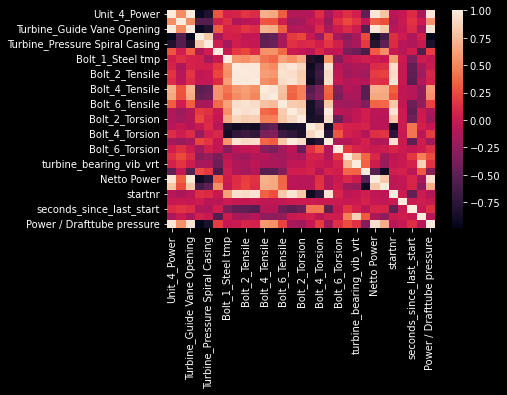

In [171]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='timepoints'>

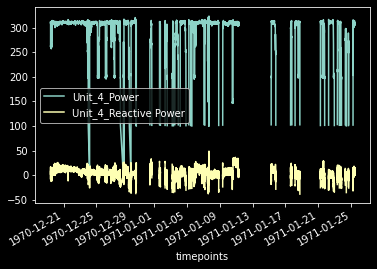

In [172]:
df[["Unit_4_Power", "Unit_4_Reactive Power"]].plot()